In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_deaths = pd.read_csv ("Dataset/USA/USADecember23.csv")
df_deaths = df_deaths.drop(['Recovered', 'Active', 'Total_Test_Results', 'People_Hospitalized', 'Testing_Rate', 'Hospitalization_Rate'], axis=1)
df_deaths.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,FIPS,Incident_Rate,Case_Fatality_Ratio,UID,ISO3
0,Alabama,US,2023-01-13 04:31:19,32.3182,-86.9023,1596149,20820,1.0,32553.309736,1.304390,84000001.0,USA
1,Alaska,US,2023-01-13 04:31:19,61.3707,-152.4044,302272,1455,2.0,41319.672747,0.481355,84000002.0,USA
2,American Samoa,US,2023-01-13 04:31:19,-14.2710,-170.1320,8309,34,60.0,14933.232688,0.409195,16.0,ASM
3,Arizona,US,2023-01-13 04:31:19,33.7298,-111.4312,2391895,32503,4.0,32861.491936,1.358881,84000004.0,USA
4,Arkansas,US,2023-01-13 04:31:19,34.9697,-92.3731,990958,12743,5.0,32837.056350,1.285927,84000005.0,USA


In [7]:
df_vaccine = pd.read_csv ("Dataset/USA/VaccinationUSA.csv")
df_vaccine.head()

,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated
0,1.0,Alabama,US,2022-09-21,32.3182,-86.9023,"Alabama, US",2560721,578638.0
1,2.0,Alaska,US,2022-09-21,61.3707,-152.4044,"Alaska, US",464318,59618.0
2,60.0,American Samoa,US,2022-09-21,-14.2710,-170.1320,"American Samoa, US",42318,3606.0
3,4.0,Arizona,US,2022-09-21,33.7298,-111.4312,"Arizona, US",5186823,903549.0
4,5.0,Arkansas,US,2022-09-21,34.9697,-92.3731,"Arkansas, US",1680219,381361.0


In [8]:
df_deaths.describe()

,Lat,Long_,Confirmed,Deaths,FIPS,Incident_Rate,Case_Fatality_Ratio,UID
count,56.000000,56.000000,5.800000e+01,58.000000,58.000000,56.000000,58.000000,5.800000e+01
mean,36.840089,-85.206614,1.751789e+06,18958.172414,3288.086207,30348.256206,1.020123,7.676194e+07
std,10.887035,49.754449,2.200735e+06,22840.934032,17408.350591,4898.592828,0.403037,2.378302e+07
min,-14.271000,-170.132000,4.900000e+01,0.000000,1.000000,14933.232688,0.000000,1.600000e+01
25%,34.594600,-101.165775,3.357795e+05,3154.750000,18.250000,27993.136417,0.812788,8.400001e+07
50%,39.061850,-87.944200,1.028223e+06,12303.000000,32.500000,30895.255462,1.062833,8.400003e+07
75%,42.361650,-76.970625,2.138015e+06,23149.750000,47.750000,33305.824776,1.234270,8.400004e+07
max,61.370700,145.673900,1.192007e+07,99043.000000,99999.000000,42531.205132,2.912621,8.410000e+07


In [9]:
df_vaccine.describe()

,FIPS,Lat,Long_,People_Fully_Vaccinated,People_Partially_Vaccinated
count,56.000000,56.000000,56.000000,6.000000e+01,5.900000e+01
mean,32.535714,36.840089,-85.206614,3.866264e+06,7.699129e+05
std,19.075891,10.887035,49.754449,4.965960e+06,1.107978e+06
min,1.000000,-14.271000,-170.132000,4.231800e+04,2.437000e+03
25%,17.750000,34.594600,-101.165775,9.497885e+05,1.513180e+05
50%,31.500000,39.061850,-87.944200,2.544936e+06,3.813610e+05
75%,46.250000,42.361650,-76.970625,4.811092e+06,7.010075e+05
max,78.000000,61.370700,145.673900,2.909316e+07,5.858105e+06


### **Explanation of Combined Correlation Between COVID-19 Impact and Vaccination Metrics (USA)**
The graph below is a **Combined Correlation Heatmap** for COVID-19 metrics and vaccination data in the USA. It shows the relationships between variables related to COVID-19 cases (e.g., Confirmed Cases, Deaths, Incident Rate, Case Fatality Ratio) and vaccination data (e.g., People Fully Vaccinated, People Partially Vaccinated).

**Key Insights:**
- **Strong Positive Correlations**:
  - **Confirmed Cases and Deaths** have a high positive correlation (**0.97**), meaning regions with higher confirmed cases also tend to see more deaths.
  - **Confirmed Cases and People Fully Vaccinated** also show a very high correlation (**0.99**), suggesting areas with higher vaccination rates might be regions that had higher confirmed cases, possibly due to larger populations or vaccine distribution efforts targeting such regions.
  - There is also a notable correlation (**0.75-0.77**) between **People Fully Vaccinated** and **People Partially Vaccinated**, which is expected as higher overall vaccination efforts tend to see increases in both categories.
- **Moderate to Low Correlations**:
  - **Case Fatality Ratio** has a weaker correlation with **Confirmed Cases (0.22)** and **Deaths (0.36)**, which suggests that the fatality ratio does not directly scale with the overall numbers of cases or deaths, possibly due to differences in healthcare quality and demographics.
  - Interestingly, **People Partially Vaccinated** has a moderate correlation (**0.72**) with **Deaths**, which could imply regions with slower vaccination uptake may have had higher mortality rates.
- **Insights for Policy & Planning**:
  - Understanding the correlation between **vaccination metrics and COVID-19 impact** can guide future policies, such as targeting regions with lower vaccination rates or addressing areas with high fatality ratios.
  - It can also provide insights into the effectiveness of vaccination efforts and their impact on reducing case severity and fatality rates.
- Overall, this heatmap helps visualize how different COVID-19 and vaccination metrics are interrelated in the USA, highlighting where positive or negative associations exist. 

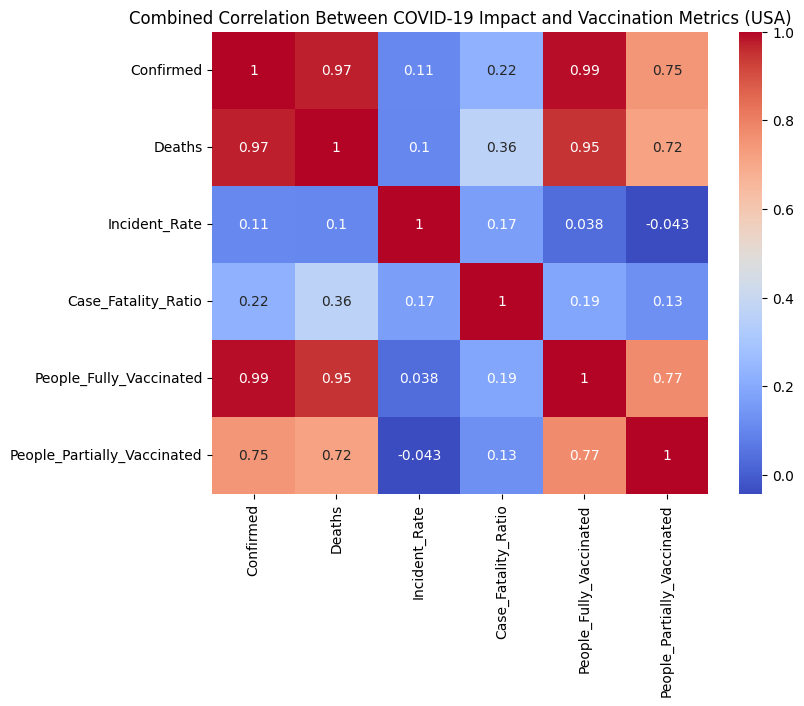

In [11]:
# Step 1: Merge `df_deaths` and `df_vaccine` DataFrames
df_usa_combined = pd.merge(df_deaths, df_vaccine, on=['Province_State', 'Country_Region', 'Lat', 'Long_'], how='inner')

# Step 2: Select Relevant Features for the Combined Correlation Analysis
features_combined_usa = df_usa_combined[['Confirmed', 'Deaths', 'Incident_Rate', 'Case_Fatality_Ratio',
                                         'People_Fully_Vaccinated', 'People_Partially_Vaccinated']]

# Step 3: Generate the Combined Correlation Matrix
correlation_matrix_combined = features_combined_usa.corr()

# Step 4: Plot the Combined Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_combined, annot=True, cmap='coolwarm')
plt.title("Combined Correlation Between COVID-19 Impact and Vaccination Metrics (USA)")
plt.show()